# Connect to googleDrive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/DL_Tasks_2024')

# Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import math

# Import our data set










In [ ]:
Iris_data = pd.read_csv('IRIS.csv')

#  Inspect the data

*   ****

> **Check the characteristics of the dataset**
  *  Total Number
  *  Balance or Not
  * check if there is a NAN or not (Not a number // Empty values)
  * check if there are Outliers


In [ ]:
print("The Shape of Iris dataset ----- > ",Iris_data.shape)

Iris_data

The Shape of Iris dataset ----- >  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Iris_data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

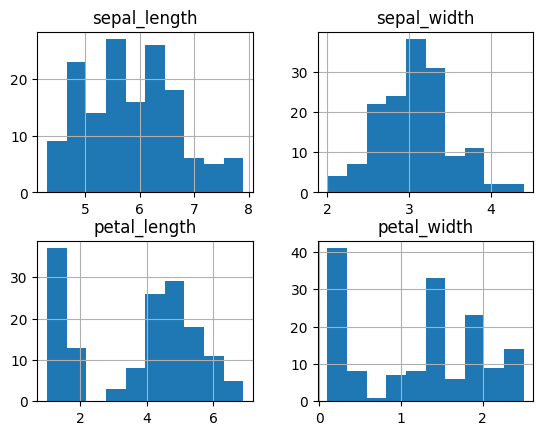

In [ ]:
Iris_data.hist()

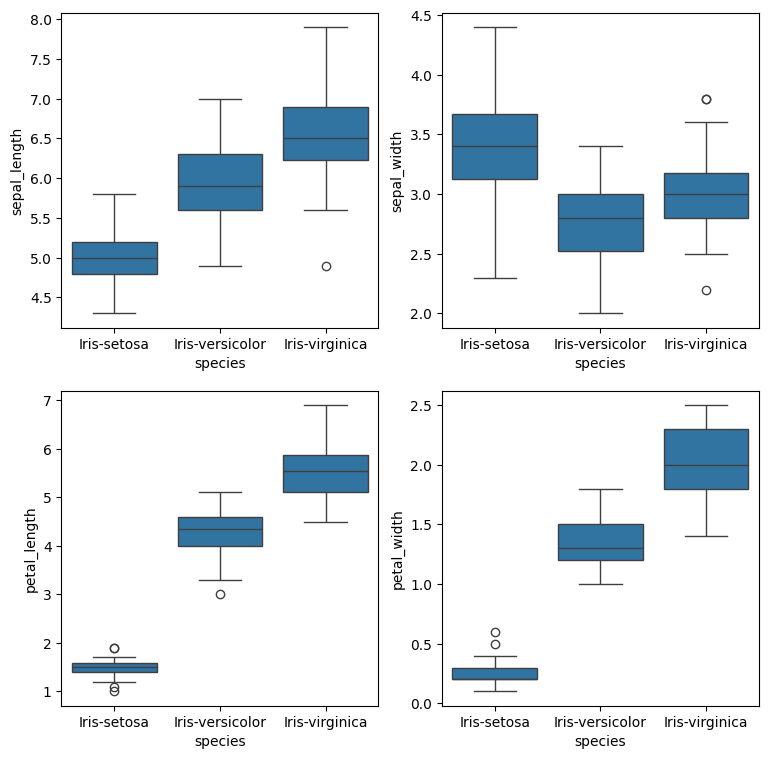

In [ ]:
subplot_init =221
list_plot = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(9,9))

for i in range(4):
  plt.subplot(subplot_init+i)
  sns.boxplot(x="species", y=list_plot[i], data=Iris_data)

plt.show()

# Preprocess


     
> **Preprpocess the data**
  *  Make sure there is no NAN (Not a number // Empty values)
  *  Replace the String objects by suitable int values ---- > one hot encoded data
  (note : we can just replace with int values without hot encoding the only difference will be in the "loss function" instead of using catogorical_crossentropy we would use sparse_catogorical_crossentropy)

In [ ]:
print(Iris_data['species'].unique())
print(Iris_data['species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
one_hot_encoded_data = pd.get_dummies(Iris_data, columns = ['species'])

In [ ]:
one_hot_encoded_data['species_Iris-setosa'].replace({True: 1, False: 0} ,
                                                    inplace=True)
one_hot_encoded_data['species_Iris-versicolor'].replace({True: 1, False: 0},
                                                        inplace=True)
one_hot_encoded_data['species_Iris-virginica'].replace({True: 1, False: 0},
                                                       inplace=True)

In [ ]:
one_hot_encoded_data

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
print(one_hot_encoded_data['species_Iris-setosa'].value_counts())
print(one_hot_encoded_data['species_Iris-versicolor'].value_counts())
print(one_hot_encoded_data['species_Iris-virginica'].value_counts())

species_Iris-setosa
0    100
1     50
Name: count, dtype: int64
species_Iris-versicolor
0    100
1     50
Name: count, dtype: int64
species_Iris-virginica
0    100
1     50
Name: count, dtype: int64


# shuffle the data



In [ ]:
shuffeled_Data = one_hot_encoded_data.sample(frac = 1)
shuffeled_Data = (shuffeled_Data.reset_index()).drop('index',
                                       axis=1,inplace= False)

In [ ]:
shuffeled_Data

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,4.6,3.1,1.5,0.2,1,0,0
1,6.9,3.1,5.4,2.1,0,0,1
2,5.7,4.4,1.5,0.4,1,0,0
3,5.8,2.6,4.0,1.2,0,1,0
4,6.7,3.0,5.2,2.3,0,0,1
...,...,...,...,...,...,...,...
145,6.6,2.9,4.6,1.3,0,1,0
146,5.0,3.3,1.4,0.2,1,0,0
147,5.1,3.5,1.4,0.3,1,0,0
148,5.0,2.0,3.5,1.0,0,1,0


# split the dataset into train, validation, and test


> (80% train / 10% validation /10% test)



In [ ]:
shuffeled_Input  = shuffeled_Data.drop(shuffeled_Data.columns[[4, 5, 6]],
                                       axis=1,inplace= False)
shuffeled_Output = shuffeled_Data.drop(shuffeled_Data.iloc[:,0:4],
                                       axis=1,inplace= False)

In [ ]:
sample_count = shuffeled_Input.shape[0]

train_samples_count = int(0.8*sample_count)
validation_samples_count = int(0.1*sample_count)
test_samples_count = sample_count-train_samples_count-validation_samples_count

train_inputs  =  shuffeled_Input.loc[: train_samples_count-1]
train_targets =  shuffeled_Output.loc[: train_samples_count-1]


validation_inputs  =  shuffeled_Input.loc[train_samples_count:train_samples_count+validation_samples_count-1 ]
validation_targets =  shuffeled_Output.loc[train_samples_count:train_samples_count+validation_samples_count-1 ]

test_inputs  =  shuffeled_Input.loc[train_samples_count+validation_samples_count: ]
test_targets =  shuffeled_Output.loc[train_samples_count+validation_samples_count: ]


# Standarization

In [ ]:
scaler = StandardScaler()

scaler.fit(train_inputs)
train_inputs      = scaler.transform(train_inputs)
validation_inputs = scaler.transform(validation_inputs)
test_inputs       = scaler.transform(test_inputs)

# check another time for balcncing  after shuffling



> every one should be arround 50 % (expexted)





In [ ]:
print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica
0                    1                        0                         41
                     0                        1                         40
1                    0                        0                         39
Name: count, dtype: int64
species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica
1                    0                        0                         8
0                    1                        0                         4
                     0                        1                         3
Name: count, dtype: int64
species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica
0                    0                        1                         7
                     1                        0                         5
1                    0                        0                         3
Name: count, dtype: int64


#   save the three datasets in *.npz

In [ ]:
np.savez('Iris_train_data',inputs=train_inputs,targets=train_targets)
np.savez('Iris_validation_data',inputs=validation_inputs,targets=validation_targets)
np.savez('Iris_test_data',inputs=test_inputs,targets=test_targets)

# Load the stored Date

In [ ]:
npz = np.load('Iris_train_data.npz')
rtrain_inputs  = npz['inputs'].astype(np.float64)
rtrain_targets = npz['targets'].astype(np.int64)

npz = np.load('Iris_validation_data.npz')
rvalidation_inputs  = npz['inputs'].astype(np.float64),
rvalidation_targets = npz['targets'].astype(np.int64)


npz = np.load('Iris_test_data.npz')
rtest_inputs  = npz['inputs'].astype(np.float64),
rtest_targets = npz['targets'].astype(np.int64)

# Model

Outline, optimization, loss, early stopping and training

In [ ]:
input_size  = 4
output_size = 3
hidden_layer_size  = 40

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


batch_size = 40
max_epochs = 200

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 0)



# Fitting the model

In [ ]:
his = model.fit(rtrain_inputs  ,
          rtrain_targets ,
          batch_size = batch_size,
          epochs = max_epochs ,
          callbacks = [early_stopping],
          validation_data = (rvalidation_inputs,rvalidation_targets),
          verbose = 2 )

Epoch 1/200
3/3 - 5s - loss: 1.3027 - accuracy: 0.0083 - val_loss: 1.2646 - val_accuracy: 0.0000e+00 - 5s/epoch - 2s/step
Epoch 2/200
3/3 - 0s - loss: 1.2152 - accuracy: 0.0083 - val_loss: 1.1645 - val_accuracy: 0.2000 - 80ms/epoch - 27ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1386 - accuracy: 0.0917 - val_loss: 1.0729 - val_accuracy: 0.4667 - 125ms/epoch - 42ms/step
Epoch 4/200
3/3 - 0s - loss: 1.0687 - accuracy: 0.4167 - val_loss: 0.9891 - val_accuracy: 0.8000 - 130ms/epoch - 43ms/step
Epoch 5/200
3/3 - 0s - loss: 1.0040 - accuracy: 0.6667 - val_loss: 0.9121 - val_accuracy: 0.9333 - 161ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.9442 - accuracy: 0.7917 - val_loss: 0.8427 - val_accuracy: 0.9333 - 142ms/epoch - 47ms/step
Epoch 7/200
3/3 - 0s - loss: 0.8914 - accuracy: 0.7917 - val_loss: 0.7819 - val_accuracy: 0.9333 - 110ms/epoch - 37ms/step
Epoch 8/200
3/3 - 0s - loss: 0.8439 - accuracy: 0.8083 - val_loss: 0.7265 - val_accuracy: 0.9333 - 75ms/epoch - 25ms/step
Epoch 9/200
3/3 - 0

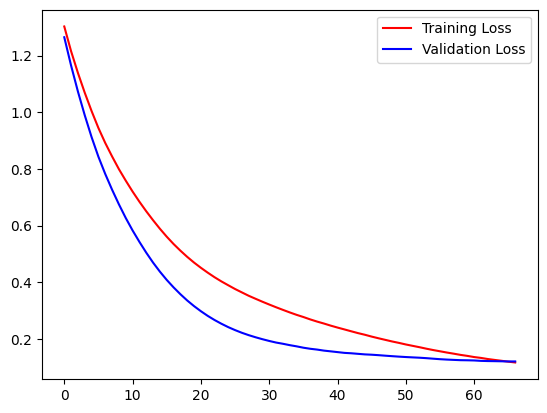

<Figure size 640x480 with 0 Axes>

In [ ]:
his_loss     = his.history['loss']
his_val_loss = his.history['val_loss']

real_num_epochs = range(len(his_loss))

plt.plot(real_num_epochs, his_loss, 'red', label='Training Loss')
plt.plot(real_num_epochs, his_val_loss, 'blue', label='Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(rtest_inputs,rtest_targets)

1/1 [==============================] - 0s 113ms/step - loss: 0.2075 - accuracy: 0.9333


# save model

In [ ]:
model.save_weights('./checkpoints/my_checkpoint/try_2/last')

# load model

In [35]:
model.load_weights('./checkpoints/my_checkpoint/try_2/last')

npz = np.load('Iris_test_data.npz')
rtest_inputs  = npz['inputs'].astype(np.float64),
rtest_targets = npz['targets'].astype(np.int64)

Try to predict & evaluate

In [36]:
test_loss, test_accuracy = model.evaluate(rtest_inputs,rtest_targets)

1/1 [==============================] - 0s 27ms/step - loss: 0.2075 - accuracy: 0.9333


In [ ]:
pred = model.predict(rtest_inputs)


print(np.round(pred))


pred =np.argmax(pred ,axis=1)
#print(pred.round(1))

1/1 [==============================] - 1s 524ms/step
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Compare

In [ ]:
print(pred)

out = np.argmax(rtest_targets ,axis=1)
print(out)

[2 1 2 2 0 1 2 2 1 2 1 0 0 1 1]
[2 1 2 2 0 1 2 2 2 2 1 0 0 1 1]
